In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import add

In [2]:
def read_indata(path):
    '''

    :param path: a string of path saved the dataset
    :return: pandas datarame
    '''
    data = pd.read_csv(path)
    return data

In [3]:
def generate_year_month_day(df, colname, string):
    '''
    :param df: dataframe we want to add column year and month
    :param colname: a stirng column name in the dataframe saved the dateandtime
    :return: dataframe after adding the column
    '''
    df['year'] = pd.DatetimeIndex(df[colname]).year
    df['month'] = pd.DatetimeIndex(df[colname]).month
    df['day'] = pd.DatetimeIndex(df[colname]).day
    return df

In [4]:
def get_city_weather(cityname, df_list, stringlist):
    new_df_list = []
    for i in range(len(stringlist)):
        citydf = df_list[i][(df_list[i].year>=2012) & (df_list[i].year<2018)].copy(deep=True)
        citydf = citydf[['year', 'month', 'day', cityname]]
        citydf[['year', 'month', 'day']] = citydf[['year', 'month', 'day']].astype(int)
        citydf = pd.DataFrame(citydf.groupby(['year', 'month', 'day']).mean())
        citydf = citydf.reset_index()
        citydf = citydf.rename(columns={cityname: stringlist[i]})

        new_df_list.append(citydf)
    return new_df_list




In [5]:

def merge_dataframe(df1, df2, mergeby):

    merged_data = pd.merge(df1, df2, on=mergeby, how='left')

    return merged_data


In [6]:
def mergeall_weather(new_df_list, mergeby):
    weather_all = new_df_list[0]
    for i in range(len(new_df_list) - 1):
        weather_all = merge_dataframe(weather_all, new_df_list[i+1], mergeby)
    return weather_all


In [7]:

def get_city(cityname, citycrime, weather_all):
    city_weather = weather_all[['year', 'month','day', cityname,'indextype']].copy(deep = True)
    citycrime_per_month = citycrime.groupby(['year', 'month', 'day']).size()
    citycrime_per_month = pd.DataFrame(citycrime_per_month.reset_index())
    citycrime_per_month = citycrime_per_month.rename(columns = {0:'Count'})
    citycrime_per_month[['year', 'month', 'day']] = citycrime_per_month[['year', 'month', 'day']].astype(int)

    city_weather[['year', 'month', 'day']] = city_weather[['year', 'month', 'day']].astype(int)

    crime_weather = pd.merge(city_weather[['year', 'month', 'day',cityname, 'indextype']], citycrime_per_month,
                             on=['year', 'month'], how='left')

    crime_weather = crime_weather[(crime_weather.year >= 2012) & (crime_weather.year < 2018)]
    crime_weather = crime_weather.rename(columns={cityname: 'indexvalue'})

    return crime_weather

In [8]:
def vectorize_humidity(df):
    if df['Humiditiy'] <= 45:
        val = 'Low'
    elif df['Humiditiy'] <= 60:
        val = 'Normal'
    elif df['Humiditiy'] > 60:
        val = 'High'
    return val


In [9]:
def vectorize_temperature(df):
    if df['Temperature'] <= 5:
        val = '0-5'
    elif df['Temperature'] <= 10:
        val = '5-10'
    elif df['Temperature'] <= 15:
        val = '10-15'
    elif df['Temperature'] <= 20:
        val = '15-20'
    elif df['Temperature'] <= 25:
        val = '20-25'
    elif df['Temperature'] <= 30:
        val = '25-30'
    elif df['Temperature'] > 30:
        val = '>30'
    return val


In [11]:
Humiditiy = read_indata('./historical-hourly-weather-data/humidity.csv')
Pressure = read_indata('./historical-hourly-weather-data/pressure.csv')
Temperature = read_indata('./historical-hourly-weather-data/temperature.csv')
weather_description = read_indata('./historical-hourly-weather-data/weather_description.csv')
wind_direction = read_indata('./historical-hourly-weather-data/wind_direction.csv')
wind_speed = read_indata('./historical-hourly-weather-data/wind_speed.csv')
chicago_crime = read_indata('./Chicago_crime_2012-2017.csv')

In [12]:
df_list = [Humiditiy, Pressure, Temperature, wind_direction,wind_speed]
stringlist = ['Humiditiy', 'Pressure', 'Temperature', 'wind_direction', 'wind_speed']

for index in range(len(df_list)):
    df = generate_year_month_day(df_list[index], 'datetime', stringlist[index])


In [15]:
Humiditiy.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,year,month,day
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,25.0,NaN,NaN,NaN,2012,10,1
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,68.0,50.0,63.0,22.0,51.0,51.0,50.0,2012,10,1
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,68.0,51.0,62.0,22.0,51.0,51.0,50.0,2012,10,1
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,68.0,51.0,62.0,22.0,51.0,51.0,50.0,2012,10,1
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,68.0,52.0,62.0,22.0,51.0,51.0,50.0,2012,10,1


In [14]:
new_df_list = get_city_weather('Chicago', df_list, stringlist)
weather_all = mergeall_weather(new_df_list, ['year', 'month', 'day'])

chicago_crime['year'] = chicago_crime.Date.str[6:10]
chicago_crime['month'] = chicago_crime.Date.str[0:2]
chicago_crime['day'] = chicago_crime.Date.str[3:5]


In [17]:
chicago_crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,year,month,day
0,11002368,JA329407,01/01/2012 12:00:00 AM,021XX N KENNETH AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,NaN,NaN,2012,11/27/2017 03:53:35 PM,NaN,NaN,NaN,2012,01,01
1,9979416,HY169652,01/01/2012 12:00:00 AM,053XX W MONROE ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,1140801.0,1899144.0,2012,02/09/2018 03:44:29 PM,41.879335,-87.758468,"(41.879335159, -87.758467514)",2012,01,01
2,10433124,HZ170983,01/01/2012 12:00:00 AM,026XX N MC VICKER AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,True,False,...,NaN,NaN,2012,05/11/2016 03:48:18 PM,NaN,NaN,NaN,2012,01,01
3,9888481,HX538405,01/01/2012 12:00:00 AM,066XX S MAY ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,1169793.0,1860812.0,2012,02/09/2018 03:44:29 PM,41.773566,-87.653128,"(41.773566189, -87.653127978)",2012,01,01
4,10593543,HZ344934,01/01/2012 12:00:00 AM,064XX W BELLE PLAINE AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,NaN,NaN,2012,07/12/2016 03:53:40 PM,NaN,NaN,NaN,2012,01,01


In [18]:
chi_crime_per_day = chicago_crime.groupby(['year', 'month', 'day', 'Primary Type', 'Arrest',  'Domestic']).size()
chi_crime_per_day= pd.DataFrame(chi_crime_per_day.reset_index())
chi_crime_per_day = chi_crime_per_day.rename(columns = {0:'Count'})
chi_crime_per_day[['year', 'month', 'day']] = chi_crime_per_day[['year', 'month', 'day']].astype(int)


In [20]:
chi_crime_per_day.head(20)

,year,month,day,Primary Type,Arrest,Domestic,Count
0,2012,1,1,ARSON,False,False,1
1,2012,1,1,ASSAULT,False,False,23
2,2012,1,1,ASSAULT,False,True,9
3,2012,1,1,ASSAULT,True,False,10
4,2012,1,1,ASSAULT,True,True,6
5,2012,1,1,BATTERY,False,False,96
6,2012,1,1,BATTERY,False,True,108
7,2012,1,1,BATTERY,True,False,30
8,2012,1,1,BATTERY,True,True,30
9,2012,1,1,BURGLARY,False,False,37


In [22]:
crime_weather= merge_dataframe(weather_all,chi_crime_per_day,['year', 'month', 'day'])
crime_weather = crime_weather.dropna()
crime_weather['Temperature'] = crime_weather['Temperature'] - 273.15


In [23]:
### Merged dataset 
crime_weather.head(20)

,year,month,day,Humiditiy,Pressure,Temperature,wind_direction,wind_speed,Primary Type,Arrest,Domestic,Count
0,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,ARSON,False,False,4
1,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,ASSAULT,False,False,33
2,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,ASSAULT,False,True,9
3,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,ASSAULT,True,False,15
4,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,ASSAULT,True,True,3
5,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,BATTERY,False,False,57
6,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,BATTERY,False,True,45
7,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,BATTERY,True,False,16
8,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,BATTERY,True,True,20
9,2012,10,1,68.909091,1014.0,11.402669,0.0,0.0,BURGLARY,False,False,75


In [25]:
crime_subset = crime_weather[['year', 'month', 'day','Humiditiy', 'Count','Primary Type']].copy(deep = True)
crime_subset['Reltaive Humidity'] = subset.apply(vectorize_humidity, axis = 1)


In [36]:
crime_subset.head()

,year,month,day,Humiditiy,Count,Primary Type,Reltaive Humidity
0,2012,10,1,68.909091,4,ARSON,High
1,2012,10,1,68.909091,33,ASSAULT,High
2,2012,10,1,68.909091,9,ASSAULT,High
3,2012,10,1,68.909091,15,ASSAULT,High
4,2012,10,1,68.909091,3,ASSAULT,High


In [37]:
crime_count = pd.DataFrame(subset.groupby(['Primary Type','Reltaive Humidity']).agg({'Count':np.sum}))
crime_count_total = crime_count.reset_index()

In [38]:
crime_count_total.head()

,Primary Type,Reltaive Humidity,Count
0,ARSON,High,1808
1,ARSON,Low,67
2,ARSON,Normal,360
3,ASSAULT,High,76357
4,ASSAULT,Low,2524


(76357, 214420, 126405, 2364)


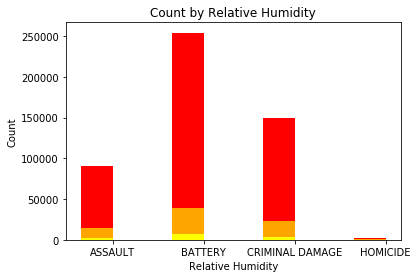

In [42]:
crime_count = crime_count_total.loc[crime_count_total['Primary Type'].isin(['ASSAULT','BATTERY', 'CRIMINAL DAMAGE','HOMICIDE'])]
fig, ax = plt.subplots()
N = len(set(crime_count['Primary Type']))
HighCounts = tuple(crime_count.loc[crime_count['Reltaive Humidity'] == 'High', 'Count'])
NormalCounts = tuple(crime_count.loc[crime_count['Reltaive Humidity'] == 'Normal', 'Count'])
LowCounts = tuple(crime_count.loc[crime_count['Reltaive Humidity'] == 'Low', 'Count'])
ind = np.arange(N)
width = 0.35

p1 = ax.bar(ind, LowCounts, width,color='Yellow')
p2 = ax.bar(ind, NormalCounts, width, color='Orange', bottom = LowCounts)
p3 = ax.bar(ind, HighCounts, width, color = 'Red', bottom = NormalCounts)
ax.set_ylabel('Count')
ax.set_xlabel('Relative Humidity')
ax.set_title('Count by Relative Humidity')
ax.set_xticks(ind + width / 2.)
#ax.set_yticks(np.arange(0, 81, 10))
ax.set_xticklabels(('ASSAULT','BATTERY', 'CRIMINAL DAMAGE','HOMICIDE'))
plt.show()

[0.15196310312204353, 0.15179050275049416, 0.14995599882663538, 0.15146239554317548]


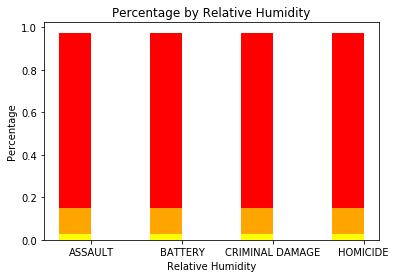

In [53]:
fig, ax = plt.subplots()
N = len(set(crime_count['Primary Type']))
HighCounts = list(crime_count.loc[crime_count['Reltaive Humidity'] == 'High', 'Count'])
NormalCounts = list(crime_count.loc[crime_count['Reltaive Humidity'] == 'Normal', 'Count'])
LowCounts = list(crime_count.loc[crime_count['Reltaive Humidity'] == 'Low', 'Count'])
totalCounts = list(map(sum, zip(HighCounts,NormalCounts,LowCounts)))


Highpercent = [x/y for x, y in zip(HighCounts, totalCounts)]
Normalpercent = [x/y for x, y in zip(NormalCounts, totalCounts)]
Lowpercent = [x/y for x, y in zip(LowCounts, totalCounts)]
ind = np.arange(N)
width = 0.35

p1 = ax.bar(ind, Lowpercent, width,color='Yellow')
p2 = ax.bar(ind, Normalpercent, width, color='Orange', bottom = Lowpercent)
p3 = ax.bar(ind, Highpercent, width, color = 'Red', bottom = Normalpercent)
ax.set_ylabel('Percentage')
ax.set_xlabel('Relative Humidity')
ax.set_title('Percentage by Relative Humidity')
ax.set_xticks(ind + width / 2.)
#ax.set_yticks(np.arange(0, 81, 10))
ax.set_xticklabels(('ASSAULT','BATTERY', 'CRIMINAL DAMAGE','HOMICIDE'))
plt.show()

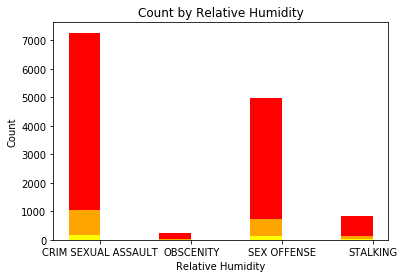

In [58]:
crime_count = crime_count_total.loc[crime_count_total['Primary Type'].isin(['CRIM SEXUAL ASSAULT','OBSCENITY', 'SEX OFFENSE','STALKING'])]
fig, ax = plt.subplots()
N = len(set(crime_count['Primary Type']))
HighCounts = tuple(crime_count.loc[crime_count['Reltaive Humidity'] == 'High', 'Count'])
NormalCounts = tuple(crime_count.loc[crime_count['Reltaive Humidity'] == 'Normal', 'Count'])
LowCounts = tuple(crime_count.loc[crime_count['Reltaive Humidity'] == 'Low', 'Count'])
ind = np.arange(N)
width = 0.35

p1 = ax.bar(ind, LowCounts, width,color='Yellow')
p2 = ax.bar(ind, NormalCounts, width, color='Orange', bottom = LowCounts)
p3 = ax.bar(ind, HighCounts, width, color = 'Red', bottom = NormalCounts)
ax.set_ylabel('Count')
ax.set_xlabel('Relative Humidity')
ax.set_title('Count by Relative Humidity')
ax.set_xticks(ind + width / 2.)
ax.set_xticklabels(('CRIM SEXUAL ASSAULT','OBSCENITY', 'SEX OFFENSE','STALKING'))
plt.show()

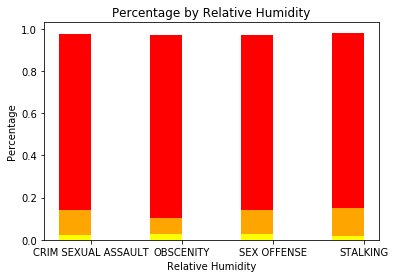

In [57]:
fig, ax = plt.subplots()
N = len(set(crime_count['Primary Type']))
HighCounts = list(crime_count.loc[crime_count['Reltaive Humidity'] == 'High', 'Count'])
NormalCounts = list(crime_count.loc[crime_count['Reltaive Humidity'] == 'Normal', 'Count'])
LowCounts = list(crime_count.loc[crime_count['Reltaive Humidity'] == 'Low', 'Count'])
totalCounts = list(map(sum, zip(HighCounts,NormalCounts,LowCounts)))


Highpercent = [x/y for x, y in zip(HighCounts, totalCounts)]
Normalpercent = [x/y for x, y in zip(NormalCounts, totalCounts)]
Lowpercent = [x/y for x, y in zip(LowCounts, totalCounts)]
ind = np.arange(N)
width = 0.35

p1 = ax.bar(ind, Lowpercent, width,color='Yellow')
p2 = ax.bar(ind, Normalpercent, width, color='Orange', bottom = Lowpercent)
p3 = ax.bar(ind, Highpercent, width, color = 'Red', bottom = Normalpercent)
ax.set_ylabel('Percentage')
ax.set_xlabel('Relative Humidity')
ax.set_title('Percentage by Relative Humidity')
ax.set_xticks(ind + width / 2.)
#ax.set_yticks(np.arange(0, 81, 10))
ax.set_xticklabels(('CRIM SEXUAL ASSAULT','OBSCENITY', 'SEX OFFENSE','STALKING'))
plt.show()